In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from utils import *

(-0.5, 3599.5, 1800.5, -0.5)

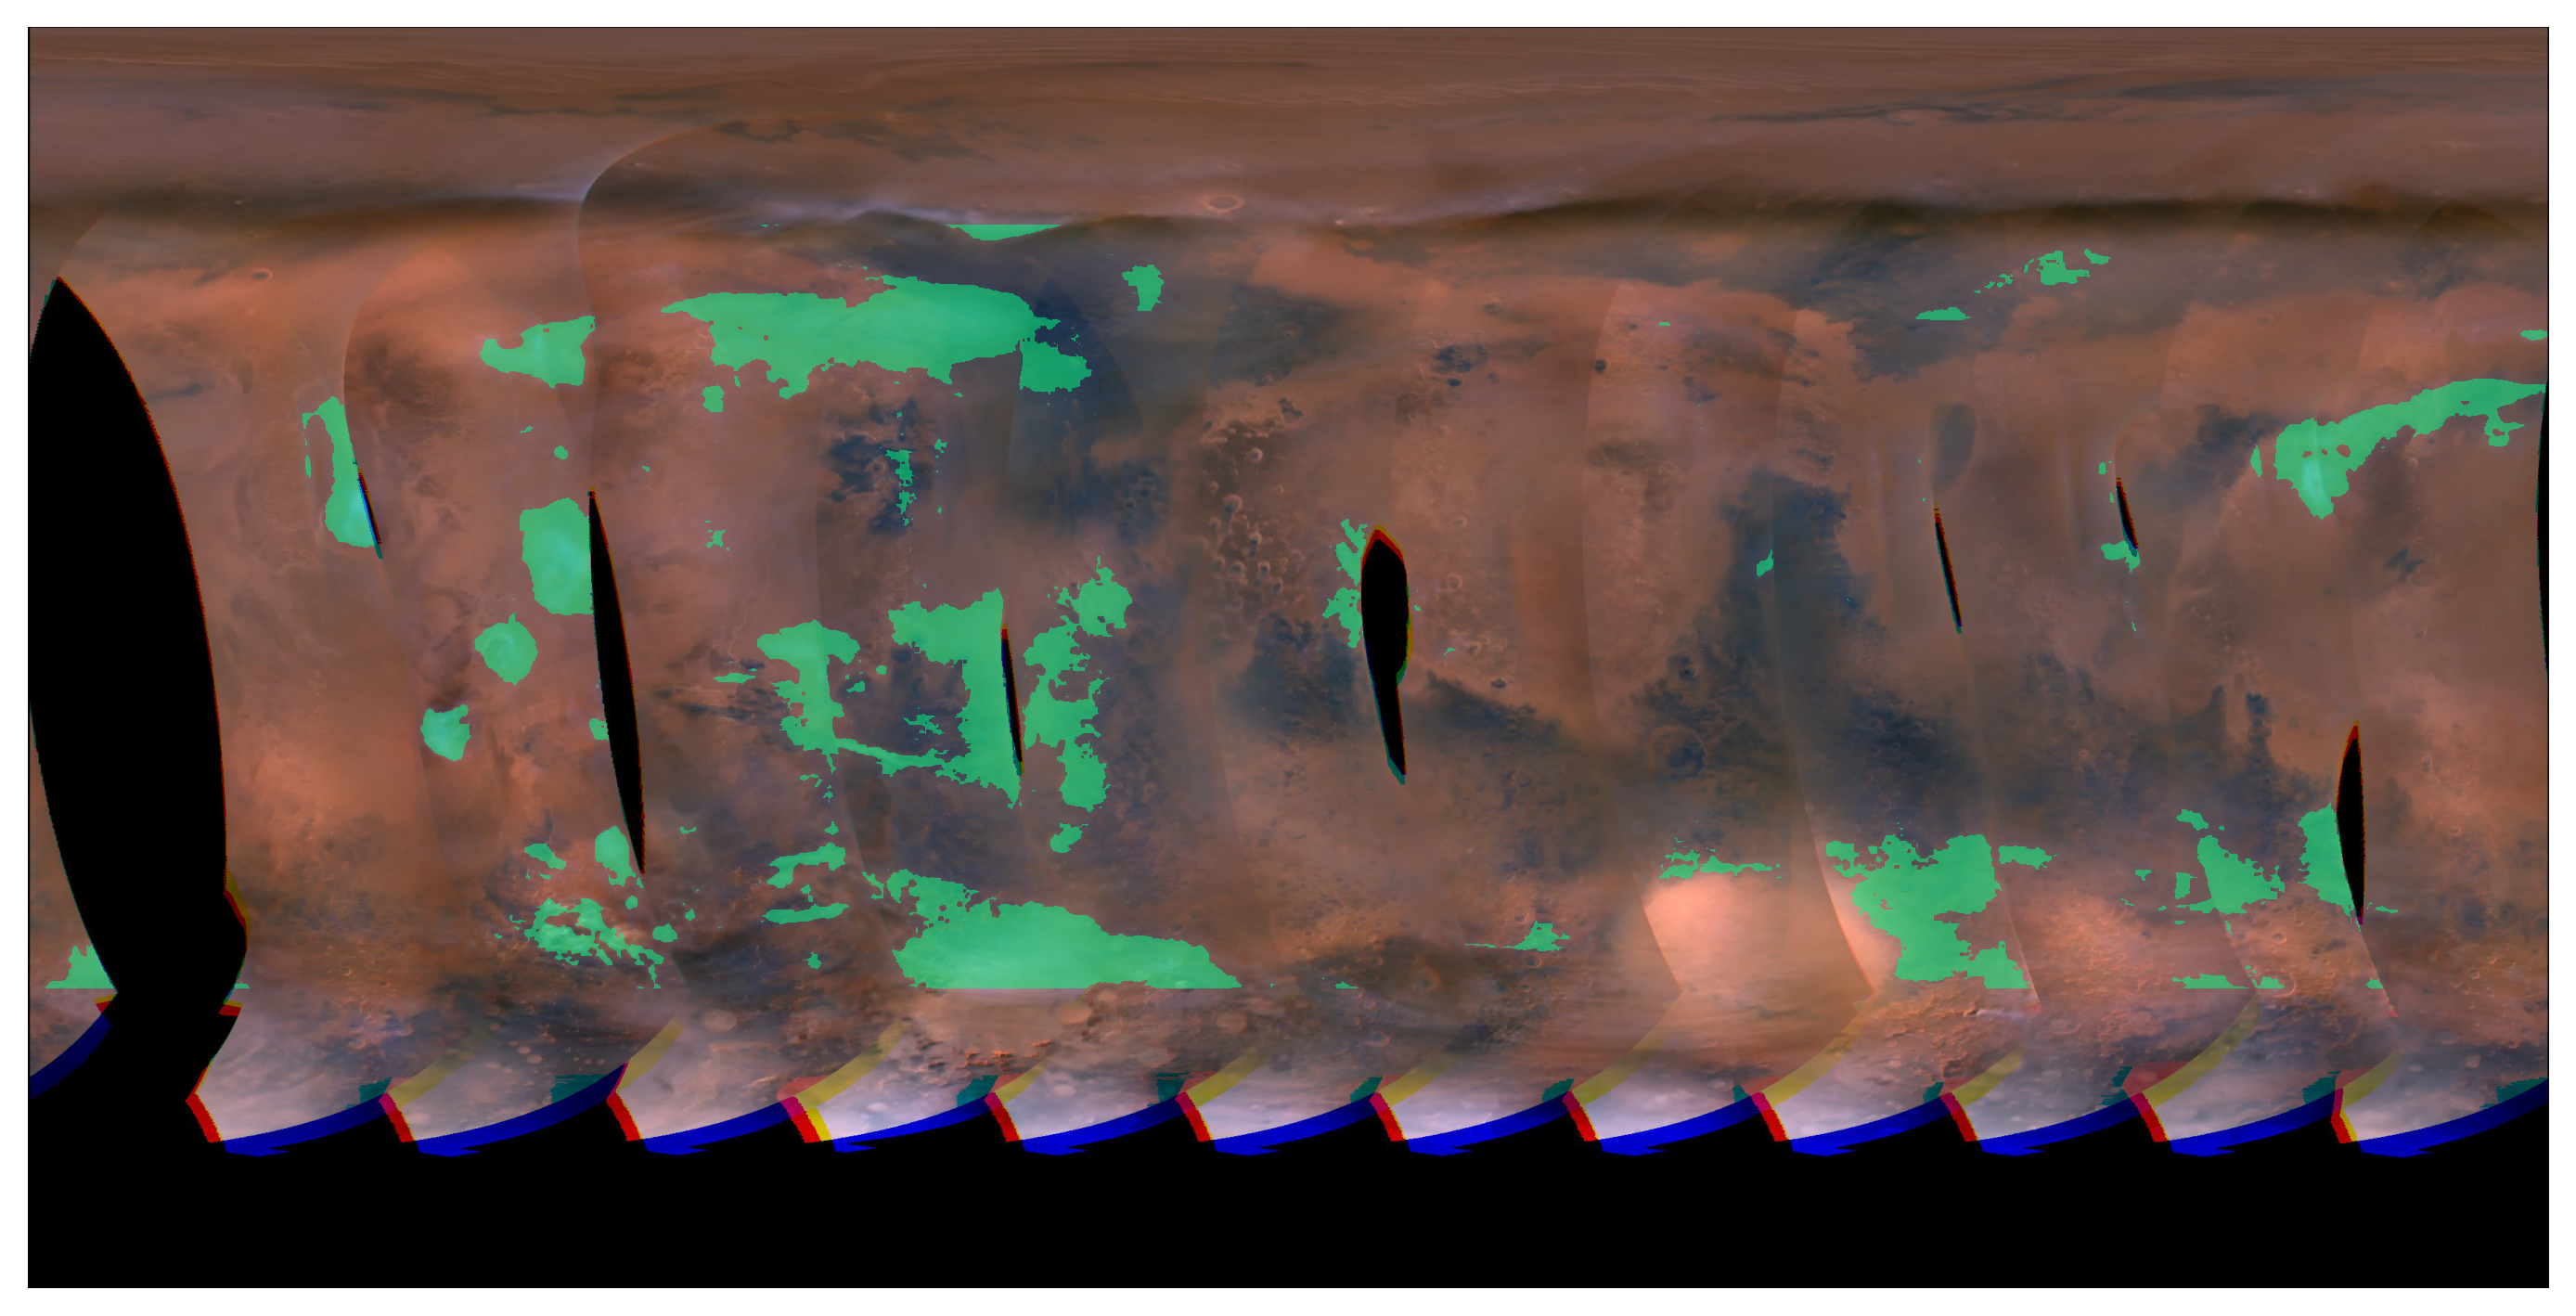

In [3]:
PATH_TO_PREDS = "./data/preds/"
SUBPHASE = "P16"
DAY = 4

fig = plt.figure(num=None, figsize=(12, 6), dpi=300, facecolor="w", edgecolor="k")
ax = fig.add_subplot()

# path as follows: path/to/predMDGM/**/*.jpg
mdgm = Image.open(
    os.path.join(
        PATH_TO_PREDS,
        SUBPHASE[0],
        SUBPHASE,
        "mdgms",
        "{}_day{}.jpg".format(SUBPHASE, "{:02d}".format(DAY)),
    )
)
cloudmask = get_cloudmask(
    os.path.join(
        PATH_TO_PREDS,
        SUBPHASE[0],
        SUBPHASE,
        "cloudmasks",
        "cloudmask_{}_day{}.ncdf".format(SUBPHASE, "{:02d}".format(DAY)),
    )
)

ax.imshow(mdgm)
ax.imshow(
    np.ma.masked_where(cloudmask < 1, cloudmask),
    vmin=0,
    vmax=1,
    cmap="winter",
    alpha=0.5,
)
ax.axis("off")

[(-0.5, 599.5, 599.5, -0.5),
 (-0.5, 599.5, 599.5, -0.5),
 (-0.5, 599.5, 599.5, -0.5)]

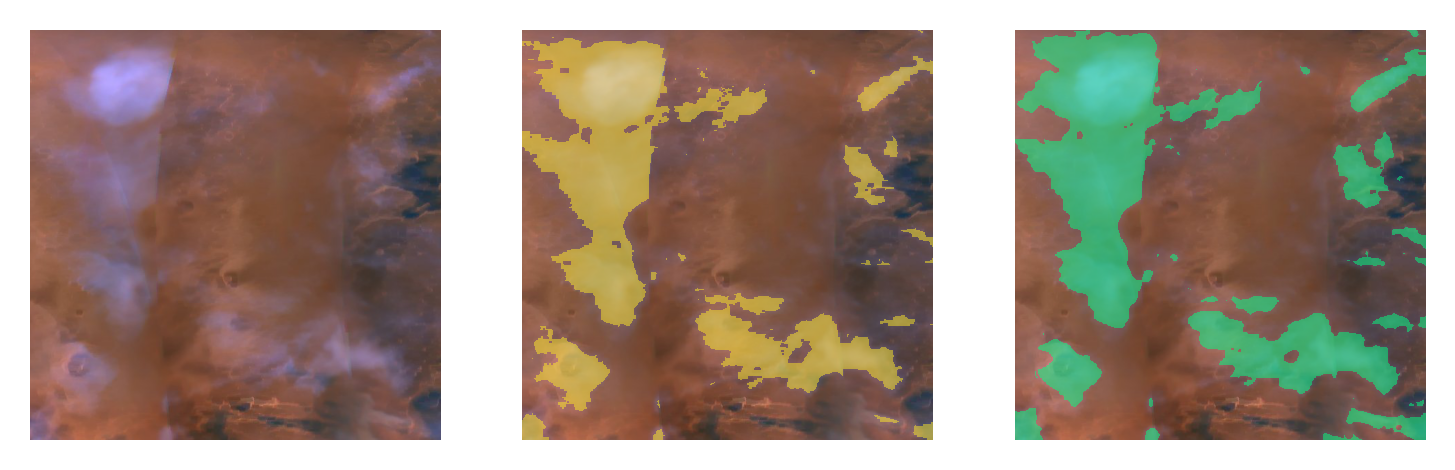

In [4]:
# plots a cropped MDGM with the train and prediction masks side-by-side
# left is raw mdgm, middle is mdgm with the training mask, and right is mdgm with the model's mask
PATH_TO_PREDS = "./data/preds/"
PATH_TO_TRAIN = "./data/train/"
SUBPHASE = "P01"
DAY = 19

# Crop coordinates (axis 0 = {0,1801}, axis 1 = {0,3600}). Format: (top x, top y, bottom x, bottom y)
loc = (600, 400, 1200, 1000)

fig = plt.figure(num=None, figsize=(6, 4), dpi=300, facecolor="w", edgecolor="k")
axs = fig.subplots(1, 3)

mdgm = Image.open(
    os.path.join(
        PATH_TO_PREDS,
        SUBPHASE[0],
        SUBPHASE,
        "mdgms",
        "{}_day{}.jpg".format(SUBPHASE, "{:02d}".format(DAY)),
    )
)
sub_mdgm = mdgm.crop(loc)

cloudmask_train = get_cloudmask(
    os.path.join(
        PATH_TO_TRAIN,
        SUBPHASE,
        "cloudmask",
        "cloudmask_{}day{}.ncdf".format(SUBPHASE, "{:02d}".format(DAY)),
    )
)[loc[1] : loc[3], loc[0] : loc[2], ...]

cloudmask_preds = get_cloudmask(
    os.path.join(
        PATH_TO_PREDS,
        SUBPHASE[0],
        SUBPHASE,
        "cloudmasks",
        "cloudmask_{}_day{}.ncdf".format(SUBPHASE, "{:02d}".format(DAY)),
    )
)[loc[1] : loc[3], loc[0] : loc[2], ...]

axs[0].imshow(sub_mdgm)

axs[1].imshow(sub_mdgm)
axs[1].imshow(
    np.ma.masked_where(cloudmask_train < 1, cloudmask_train),
    vmin=0,
    vmax=1,
    cmap="viridis",
    alpha=0.5,
)

axs[2].imshow(sub_mdgm)
axs[2].imshow(
    np.ma.masked_where(cloudmask_preds < 1, cloudmask_preds),
    vmin=0,
    vmax=1,
    cmap="winter",
    alpha=0.5,
)

[ax.axis("off") for ax in axs]